# Demo mmlab/mmdetection

- github https://github.com/open-mmlab/mmdetection
- docker ufoym/deepo:pytorch-py36-cu90
- framework pytorch 1.0

Test a new image fomr website on pretrain model `retinanet_r50_fpn_1x_20181125-3d3c2142.pth`.

---

Bug: https://github.com/open-mmlab/mmcv/issues/34

Visualize the detection result by plt

In [1]:
import mmcv
from mmcv.runner import load_checkpoint
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result

cfg = mmcv.Config.fromfile('../configs/retinanet_r50_fpn_1x.py')
cfg.model.pretrained = None

# construct the model and load checkpoint
model = build_detector(cfg.model, test_cfg=cfg.test_cfg)
_ = load_checkpoint(model, '../model/retinanet_r50_fpn_1x_20181125-3d3c2142.pth')

In [2]:
# test a single image
img = mmcv.imread('../demo/street.jpg')
result = inference_detector(model, img, cfg)

# # Bug: cannost use mmdet.apis.show_result, it's implement by cv2 that will leads to crash in jupyter
# show_result(img, result)

img=(700, 700, 3), bboxes=(100, 5), labels=(100,)


<Figure size 432x288 with 0 Axes>

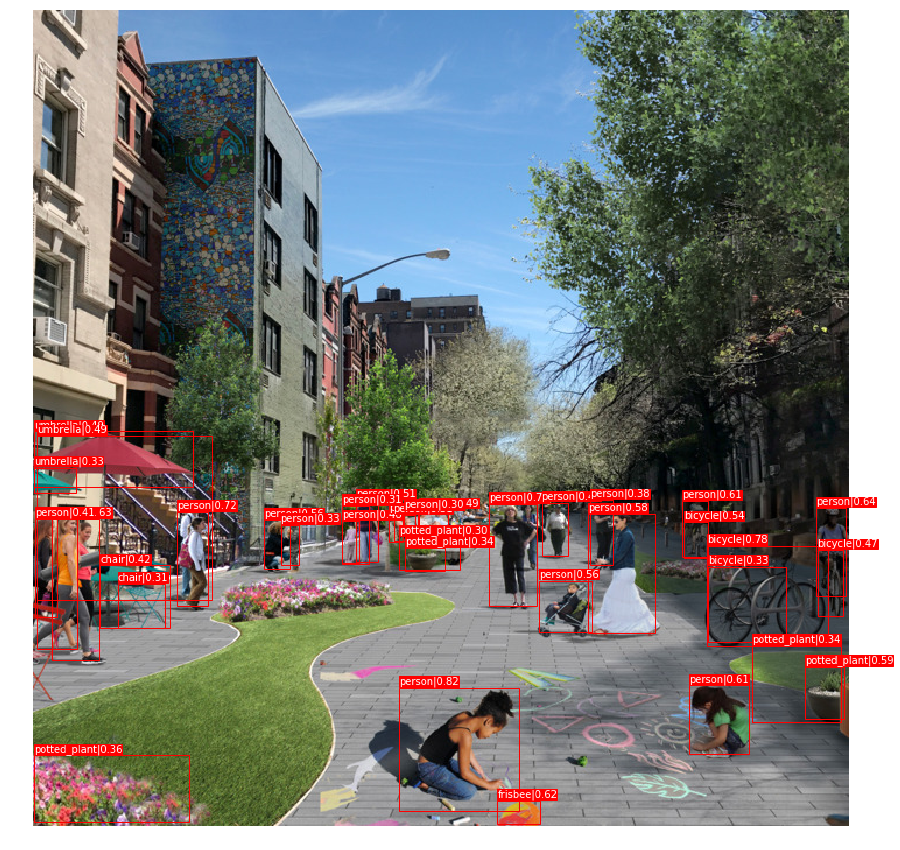

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mmdet.core import get_classes
from mmcv.visualization import color_val

def show_result(img, result):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    class_names = get_classes('coco')
    labels = [
        np.full(bbox.shape[0], i, dtype=np.int32)
        for i, bbox in enumerate(result)
    ]
    labels = np.concatenate(labels)
    bboxes = np.vstack(result)
    print(f"img={img.shape}, bboxes={bboxes.shape}, labels={labels.shape}")
    
    # test score threshold = 0.3
    score_thr = 0.3
    assert bboxes.shape[1] == 5
    scores = bboxes[:, -1]
    inds = scores > score_thr
    bboxes = bboxes[inds, :]
    labels = labels[inds]
    thickness = 1
    font_scale=0.5
    bbox_color = color_val('green')
    text_color = color_val('green')
    
    plt.figure()
    fig, ax = plt.subplots(1, figsize=(15, 15))
    for bbox, label in zip(bboxes, labels):
        bbox_int = bbox.astype(np.int32)
        left_top = (bbox_int[0], bbox_int[1])
        right_bottom = (bbox_int[2], bbox_int[3])
        w = int(bbox_int[2] - bbox_int[0])
        h = int(bbox_int[3] - bbox_int[1])

        label_text = class_names[
            label] if class_names is not None else 'cls {}'.format(label)
        if len(bbox) > 4:
            label_text += '|{:.02f}'.format(bbox[-1])

        ax.imshow(img)
        rect = patches.Rectangle(left_top, w, h, linewidth=1, edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        plt.text(bbox_int[0], bbox_int[1]-10 , s=label_text, 
                color='white', verticalalignment='top',
                bbox={'color': 'r', 'pad': 0})

    plt.axis('off')
    plt.show()


show_result(img.copy(), result)